In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: GM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


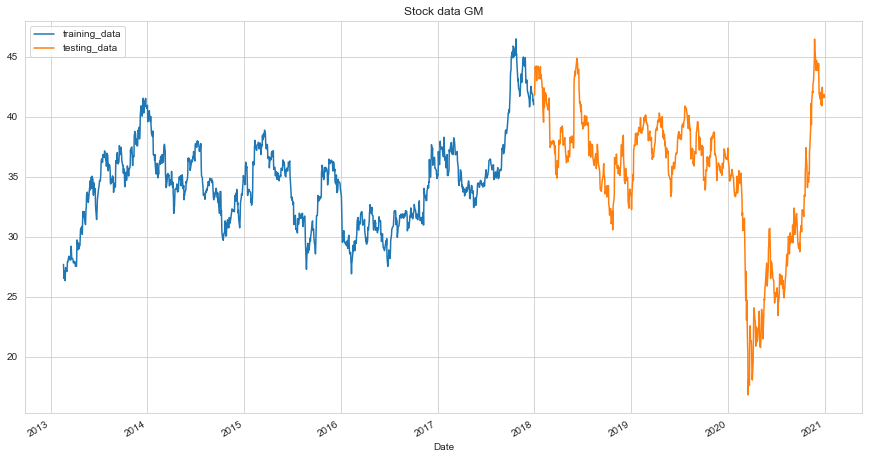

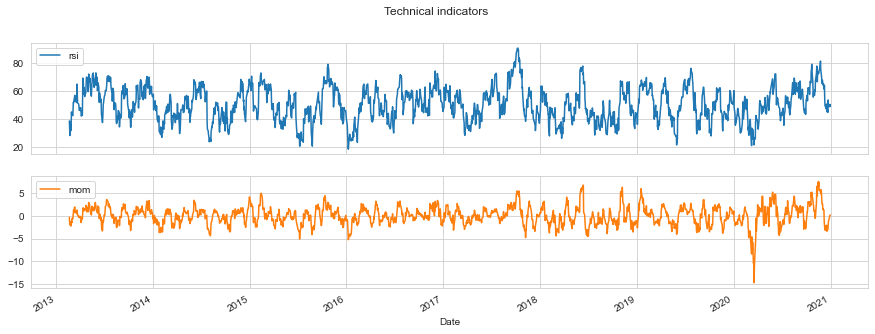

In [11]:
stock_name = 'gm'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1304.54, duration: 0:00:00.258058
episode: 2/2000, episode end value: 1260.29, duration: 0:00:00.262057
episode: 3/2000, episode end value: 1265.21, duration: 0:00:00.253059
episode: 4/2000, episode end value: 1264.72, duration: 0:00:00.242054
episode: 5/2000, episode end value: 1290.74, duration: 0:00:00.245053
episode: 6/2000, episode end value: 1238.09, duration: 0:00:00.226048
episode: 7/2000, episode end value: 1304.12, duration: 0:00:00.256058
episode: 8/2000, episode end value: 1252.68, duration: 0:00:00.251057
episode: 9/2000, episode end value: 1302.52, duration: 0:00:00.257055
episode: 10/2000, episode end value: 1337.68, duration: 0:00:00.220049
episode: 11/2000, episode end value: 1231.31, duration: 0:00:00.210046
episode: 12/2000, episode end value: 1249.04, duration: 0:00:00.237053
episode: 13/2000, episode end value: 1297.33, duration: 0:00:00.229051
episode: 14/2000, episode end value: 1266.57, duration: 0:00:00.212049
episode: 15/200

episode: 117/2000, episode end value: 1262.46, duration: 0:00:00.235052
episode: 118/2000, episode end value: 1286.59, duration: 0:00:00.259058
episode: 119/2000, episode end value: 1284.97, duration: 0:00:00.251052
episode: 120/2000, episode end value: 1294.24, duration: 0:00:00.283063
episode: 121/2000, episode end value: 1181.39, duration: 0:00:00.242055
episode: 122/2000, episode end value: 1236.16, duration: 0:00:00.280059
episode: 123/2000, episode end value: 1290.65, duration: 0:00:00.301070
episode: 124/2000, episode end value: 1265.43, duration: 0:00:00.289065
episode: 125/2000, episode end value: 1297.74, duration: 0:00:00.273059
episode: 126/2000, episode end value: 1290.97, duration: 0:00:00.271057
episode: 127/2000, episode end value: 1307.90, duration: 0:00:00.272065
episode: 128/2000, episode end value: 1274.59, duration: 0:00:00.320070
episode: 129/2000, episode end value: 1291.56, duration: 0:00:00.300067
episode: 130/2000, episode end value: 1308.69, duration: 0:00:00

episode: 231/2000, episode end value: 1205.34, duration: 0:00:00.450099
episode: 232/2000, episode end value: 1263.01, duration: 0:00:00.410098
episode: 233/2000, episode end value: 1325.41, duration: 0:00:00.424093
episode: 234/2000, episode end value: 1309.56, duration: 0:00:00.377086
episode: 235/2000, episode end value: 1301.60, duration: 0:00:00.355078
episode: 236/2000, episode end value: 1203.85, duration: 0:00:00.262057
episode: 237/2000, episode end value: 1298.70, duration: 0:00:00.333079
episode: 238/2000, episode end value: 1286.44, duration: 0:00:00.393087
episode: 239/2000, episode end value: 1292.88, duration: 0:00:00.350083
episode: 240/2000, episode end value: 1315.02, duration: 0:00:00.323070
episode: 241/2000, episode end value: 1261.48, duration: 0:00:00.333076
episode: 242/2000, episode end value: 1299.02, duration: 0:00:00.324074
episode: 243/2000, episode end value: 1277.22, duration: 0:00:00.347074
episode: 244/2000, episode end value: 1288.43, duration: 0:00:00

episode: 345/2000, episode end value: 1274.53, duration: 0:00:00.461101
episode: 346/2000, episode end value: 1175.78, duration: 0:00:00.393088
episode: 347/2000, episode end value: 1309.48, duration: 0:00:00.544124
episode: 348/2000, episode end value: 1269.18, duration: 0:00:00.440098
episode: 349/2000, episode end value: 1220.38, duration: 0:00:00.418092
episode: 350/2000, episode end value: 1292.23, duration: 0:00:00.421101
episode: 351/2000, episode end value: 1317.33, duration: 0:00:00.531125
episode: 352/2000, episode end value: 1291.83, duration: 0:00:00.378082
episode: 353/2000, episode end value: 1231.20, duration: 0:00:00.351079
episode: 354/2000, episode end value: 1303.88, duration: 0:00:00.432097
episode: 355/2000, episode end value: 1271.50, duration: 0:00:00.452104
episode: 356/2000, episode end value: 1159.21, duration: 0:00:00.402088
episode: 357/2000, episode end value: 1208.72, duration: 0:00:00.465107
episode: 358/2000, episode end value: 1327.66, duration: 0:00:00

episode: 459/2000, episode end value: 1263.80, duration: 0:00:00.410091
episode: 460/2000, episode end value: 1267.38, duration: 0:00:00.353080
episode: 461/2000, episode end value: 1281.27, duration: 0:00:00.435101
episode: 462/2000, episode end value: 1299.86, duration: 0:00:00.366080
episode: 463/2000, episode end value: 1269.39, duration: 0:00:00.434096
episode: 464/2000, episode end value: 1281.31, duration: 0:00:00.402092
episode: 465/2000, episode end value: 1268.89, duration: 0:00:00.419093
episode: 466/2000, episode end value: 1271.18, duration: 0:00:00.368083
episode: 467/2000, episode end value: 1299.12, duration: 0:00:00.417094
episode: 468/2000, episode end value: 1271.18, duration: 0:00:00.399091
episode: 469/2000, episode end value: 1276.32, duration: 0:00:00.412095
episode: 470/2000, episode end value: 1296.86, duration: 0:00:00.372081
episode: 471/2000, episode end value: 1273.96, duration: 0:00:00.388088
episode: 472/2000, episode end value: 1278.78, duration: 0:00:00

episode: 573/2000, episode end value: 1300.90, duration: 0:00:00.435096
episode: 574/2000, episode end value: 1276.11, duration: 0:00:00.422093
episode: 575/2000, episode end value: 1303.27, duration: 0:00:00.432096
episode: 576/2000, episode end value: 1286.91, duration: 0:00:00.433099
episode: 577/2000, episode end value: 1287.77, duration: 0:00:00.473105
episode: 578/2000, episode end value: 1298.40, duration: 0:00:00.461105
episode: 579/2000, episode end value: 1275.62, duration: 0:00:00.443099
episode: 580/2000, episode end value: 1324.42, duration: 0:00:00.443100
episode: 581/2000, episode end value: 1303.40, duration: 0:00:00.392091
episode: 582/2000, episode end value: 1289.20, duration: 0:00:00.406086
episode: 583/2000, episode end value: 1281.95, duration: 0:00:00.410094
episode: 584/2000, episode end value: 1349.11, duration: 0:00:00.429095
episode: 585/2000, episode end value: 1287.53, duration: 0:00:00.496112
episode: 586/2000, episode end value: 1307.29, duration: 0:00:00

episode: 687/2000, episode end value: 1309.24, duration: 0:00:00.326079
episode: 688/2000, episode end value: 1284.88, duration: 0:00:00.392087
episode: 689/2000, episode end value: 1323.16, duration: 0:00:00.359079
episode: 690/2000, episode end value: 1302.93, duration: 0:00:00.420096
episode: 691/2000, episode end value: 1295.43, duration: 0:00:00.418095
episode: 692/2000, episode end value: 1302.54, duration: 0:00:00.424098
episode: 693/2000, episode end value: 1274.20, duration: 0:00:00.328074
episode: 694/2000, episode end value: 1323.78, duration: 0:00:00.403091
episode: 695/2000, episode end value: 1327.98, duration: 0:00:00.438102
episode: 696/2000, episode end value: 1274.66, duration: 0:00:00.399089
episode: 697/2000, episode end value: 1285.92, duration: 0:00:00.420094
episode: 698/2000, episode end value: 1315.64, duration: 0:00:00.382085
episode: 699/2000, episode end value: 1290.83, duration: 0:00:00.420095
episode: 700/2000, episode end value: 1275.98, duration: 0:00:00

episode: 801/2000, episode end value: 1323.24, duration: 0:00:00.340079
episode: 802/2000, episode end value: 1328.49, duration: 0:00:00.386086
episode: 803/2000, episode end value: 1290.10, duration: 0:00:00.389087
episode: 804/2000, episode end value: 1292.06, duration: 0:00:00.437097
episode: 805/2000, episode end value: 1300.14, duration: 0:00:00.422095
episode: 806/2000, episode end value: 1292.61, duration: 0:00:00.467105
episode: 807/2000, episode end value: 1278.00, duration: 0:00:00.417098
episode: 808/2000, episode end value: 1333.77, duration: 0:00:00.389086
episode: 809/2000, episode end value: 1257.02, duration: 0:00:00.361081
episode: 810/2000, episode end value: 1289.27, duration: 0:00:00.442101
episode: 811/2000, episode end value: 1305.08, duration: 0:00:00.375082
episode: 812/2000, episode end value: 1298.73, duration: 0:00:00.447102
episode: 813/2000, episode end value: 1274.89, duration: 0:00:00.462103
episode: 814/2000, episode end value: 1284.27, duration: 0:00:00

episode: 915/2000, episode end value: 1303.20, duration: 0:00:00.483110
episode: 916/2000, episode end value: 1285.03, duration: 0:00:00.455102
episode: 917/2000, episode end value: 1277.54, duration: 0:00:00.442099
episode: 918/2000, episode end value: 1318.79, duration: 0:00:00.345076
episode: 919/2000, episode end value: 1292.68, duration: 0:00:00.441100
episode: 920/2000, episode end value: 1306.93, duration: 0:00:00.465104
episode: 921/2000, episode end value: 1286.91, duration: 0:00:00.439100
episode: 922/2000, episode end value: 1304.72, duration: 0:00:00.441098
episode: 923/2000, episode end value: 1280.33, duration: 0:00:00.424100
episode: 924/2000, episode end value: 1307.71, duration: 0:00:00.372085
episode: 925/2000, episode end value: 1286.52, duration: 0:00:00.359075
episode: 926/2000, episode end value: 1284.59, duration: 0:00:00.430095
episode: 927/2000, episode end value: 1296.62, duration: 0:00:00.384092
episode: 928/2000, episode end value: 1275.72, duration: 0:00:00

episode: 1029/2000, episode end value: 1332.72, duration: 0:00:00.476106
episode: 1030/2000, episode end value: 1301.78, duration: 0:00:00.413094
episode: 1031/2000, episode end value: 1316.55, duration: 0:00:00.378085
episode: 1032/2000, episode end value: 1282.05, duration: 0:00:00.425095
episode: 1033/2000, episode end value: 1292.19, duration: 0:00:00.407089
episode: 1034/2000, episode end value: 1281.49, duration: 0:00:00.401091
episode: 1035/2000, episode end value: 1299.33, duration: 0:00:00.383087
episode: 1036/2000, episode end value: 1278.77, duration: 0:00:00.373085
episode: 1037/2000, episode end value: 1275.64, duration: 0:00:00.448102
episode: 1038/2000, episode end value: 1289.87, duration: 0:00:00.374083
episode: 1039/2000, episode end value: 1298.98, duration: 0:00:00.396089
episode: 1040/2000, episode end value: 1292.12, duration: 0:00:00.360082
episode: 1041/2000, episode end value: 1295.37, duration: 0:00:00.460104
episode: 1042/2000, episode end value: 1306.33, dur

episode: 1142/2000, episode end value: 1282.02, duration: 0:00:00.411090
episode: 1143/2000, episode end value: 1292.34, duration: 0:00:00.366082
episode: 1144/2000, episode end value: 1285.60, duration: 0:00:00.425094
episode: 1145/2000, episode end value: 1288.96, duration: 0:00:00.400094
episode: 1146/2000, episode end value: 1279.75, duration: 0:00:00.356076
episode: 1147/2000, episode end value: 1279.91, duration: 0:00:00.394093
episode: 1148/2000, episode end value: 1313.45, duration: 0:00:00.425092
episode: 1149/2000, episode end value: 1294.42, duration: 0:00:00.419093
episode: 1150/2000, episode end value: 1289.25, duration: 0:00:00.404092
episode: 1151/2000, episode end value: 1276.21, duration: 0:00:00.419097
episode: 1152/2000, episode end value: 1332.17, duration: 0:00:00.428094
episode: 1153/2000, episode end value: 1285.94, duration: 0:00:00.401089
episode: 1154/2000, episode end value: 1286.97, duration: 0:00:00.413097
episode: 1155/2000, episode end value: 1291.53, dur

episode: 1255/2000, episode end value: 1281.43, duration: 0:00:00.451097
episode: 1256/2000, episode end value: 1349.21, duration: 0:00:00.357081
episode: 1257/2000, episode end value: 1287.61, duration: 0:00:00.412095
episode: 1258/2000, episode end value: 1296.11, duration: 0:00:00.441095
episode: 1259/2000, episode end value: 1301.43, duration: 0:00:00.447101
episode: 1260/2000, episode end value: 1305.82, duration: 0:00:00.405089
episode: 1261/2000, episode end value: 1339.60, duration: 0:00:00.410093
episode: 1262/2000, episode end value: 1300.05, duration: 0:00:00.404087
episode: 1263/2000, episode end value: 1283.82, duration: 0:00:00.365081
episode: 1264/2000, episode end value: 1292.33, duration: 0:00:00.424095
episode: 1265/2000, episode end value: 1301.75, duration: 0:00:00.420095
episode: 1266/2000, episode end value: 1300.28, duration: 0:00:00.390087
episode: 1267/2000, episode end value: 1289.34, duration: 0:00:00.380086
episode: 1268/2000, episode end value: 1297.53, dur

episode: 1368/2000, episode end value: 1301.10, duration: 0:00:00.346075
episode: 1369/2000, episode end value: 1304.01, duration: 0:00:00.426098
episode: 1370/2000, episode end value: 1297.58, duration: 0:00:00.445103
episode: 1371/2000, episode end value: 1326.64, duration: 0:00:00.410092
episode: 1372/2000, episode end value: 1292.23, duration: 0:00:00.437104
episode: 1373/2000, episode end value: 1301.84, duration: 0:00:00.430096
episode: 1374/2000, episode end value: 1295.79, duration: 0:00:00.387085
episode: 1375/2000, episode end value: 1294.30, duration: 0:00:00.366082
episode: 1376/2000, episode end value: 1285.44, duration: 0:00:00.368084
episode: 1377/2000, episode end value: 1289.18, duration: 0:00:00.411090
episode: 1378/2000, episode end value: 1283.40, duration: 0:00:00.402090
episode: 1379/2000, episode end value: 1289.96, duration: 0:00:00.437099
episode: 1380/2000, episode end value: 1304.97, duration: 0:00:00.414093
episode: 1381/2000, episode end value: 1283.95, dur

episode: 1481/2000, episode end value: 1287.79, duration: 0:00:00.383087
episode: 1482/2000, episode end value: 1284.53, duration: 0:00:00.408088
episode: 1483/2000, episode end value: 1302.66, duration: 0:00:00.435099
episode: 1484/2000, episode end value: 1278.23, duration: 0:00:00.436097
episode: 1485/2000, episode end value: 1297.06, duration: 0:00:00.432096
episode: 1486/2000, episode end value: 1304.71, duration: 0:00:00.390092
episode: 1487/2000, episode end value: 1329.59, duration: 0:00:00.472105
episode: 1488/2000, episode end value: 1281.92, duration: 0:00:00.407090
episode: 1489/2000, episode end value: 1280.19, duration: 0:00:00.454105
episode: 1490/2000, episode end value: 1343.84, duration: 0:00:00.439096
episode: 1491/2000, episode end value: 1277.38, duration: 0:00:00.424095
episode: 1492/2000, episode end value: 1324.45, duration: 0:00:00.396088
episode: 1493/2000, episode end value: 1295.55, duration: 0:00:00.423094
episode: 1494/2000, episode end value: 1265.22, dur

episode: 1594/2000, episode end value: 1291.88, duration: 0:00:00.394089
episode: 1595/2000, episode end value: 1293.29, duration: 0:00:00.470107
episode: 1596/2000, episode end value: 1297.39, duration: 0:00:00.441099
episode: 1597/2000, episode end value: 1298.07, duration: 0:00:00.417092
episode: 1598/2000, episode end value: 1302.30, duration: 0:00:00.426097
episode: 1599/2000, episode end value: 1296.85, duration: 0:00:00.385084
episode: 1600/2000, episode end value: 1297.05, duration: 0:00:00.437096
episode: 1601/2000, episode end value: 1334.20, duration: 0:00:00.417095
episode: 1602/2000, episode end value: 1314.15, duration: 0:00:00.424095
episode: 1603/2000, episode end value: 1281.03, duration: 0:00:00.442099
episode: 1604/2000, episode end value: 1302.19, duration: 0:00:00.442100
episode: 1605/2000, episode end value: 1297.91, duration: 0:00:00.405091
episode: 1606/2000, episode end value: 1287.29, duration: 0:00:00.393089
episode: 1607/2000, episode end value: 1302.20, dur

episode: 1707/2000, episode end value: 1296.98, duration: 0:00:00.368086
episode: 1708/2000, episode end value: 1300.85, duration: 0:00:00.347076
episode: 1709/2000, episode end value: 1286.94, duration: 0:00:00.416093
episode: 1710/2000, episode end value: 1305.09, duration: 0:00:00.351085
episode: 1711/2000, episode end value: 1299.08, duration: 0:00:00.332070
episode: 1712/2000, episode end value: 1298.16, duration: 0:00:00.375082
episode: 1713/2000, episode end value: 1299.93, duration: 0:00:00.373088
episode: 1714/2000, episode end value: 1328.84, duration: 0:00:00.392084
episode: 1715/2000, episode end value: 1293.98, duration: 0:00:00.376084
episode: 1716/2000, episode end value: 1289.14, duration: 0:00:00.414093
episode: 1717/2000, episode end value: 1296.79, duration: 0:00:00.390093
episode: 1718/2000, episode end value: 1277.13, duration: 0:00:00.411093
episode: 1719/2000, episode end value: 1305.27, duration: 0:00:00.406084
episode: 1720/2000, episode end value: 1262.47, dur

episode: 1820/2000, episode end value: 1308.18, duration: 0:00:00.371080
episode: 1821/2000, episode end value: 1316.33, duration: 0:00:00.333074
episode: 1822/2000, episode end value: 1288.36, duration: 0:00:00.384087
episode: 1823/2000, episode end value: 1281.38, duration: 0:00:00.368080
episode: 1824/2000, episode end value: 1313.25, duration: 0:00:00.380086
episode: 1825/2000, episode end value: 1293.53, duration: 0:00:00.329078
episode: 1826/2000, episode end value: 1308.43, duration: 0:00:00.332070
episode: 1827/2000, episode end value: 1284.16, duration: 0:00:00.320074
episode: 1828/2000, episode end value: 1362.72, duration: 0:00:00.360079
episode: 1829/2000, episode end value: 1306.51, duration: 0:00:00.423096
episode: 1830/2000, episode end value: 1306.97, duration: 0:00:00.344078
episode: 1831/2000, episode end value: 1268.53, duration: 0:00:00.337073
episode: 1832/2000, episode end value: 1318.11, duration: 0:00:00.427099
episode: 1833/2000, episode end value: 1278.77, dur

episode: 1933/2000, episode end value: 1295.72, duration: 0:00:00.407093
episode: 1934/2000, episode end value: 1277.67, duration: 0:00:00.343078
episode: 1935/2000, episode end value: 1308.80, duration: 0:00:00.324074
episode: 1936/2000, episode end value: 1282.62, duration: 0:00:00.390088
episode: 1937/2000, episode end value: 1299.96, duration: 0:00:00.407093
episode: 1938/2000, episode end value: 1284.86, duration: 0:00:00.330075
episode: 1939/2000, episode end value: 1325.75, duration: 0:00:00.411099
episode: 1940/2000, episode end value: 1280.95, duration: 0:00:00.380084
episode: 1941/2000, episode end value: 1321.44, duration: 0:00:00.360082
episode: 1942/2000, episode end value: 1297.63, duration: 0:00:00.395089
episode: 1943/2000, episode end value: 1290.48, duration: 0:00:00.321074
episode: 1944/2000, episode end value: 1354.71, duration: 0:00:00.324075
episode: 1945/2000, episode end value: 1293.91, duration: 0:00:00.459103
episode: 1946/2000, episode end value: 1287.70, dur

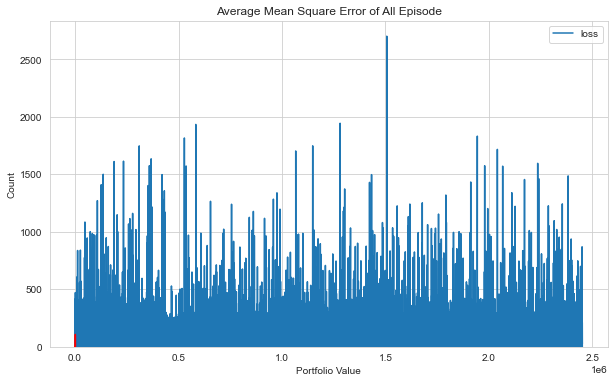

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

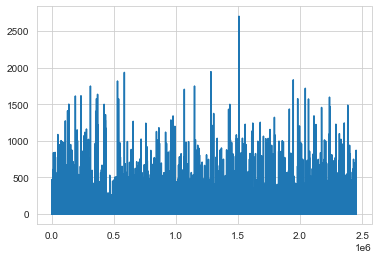

In [5]:
plt.plot(agent.model.losses)

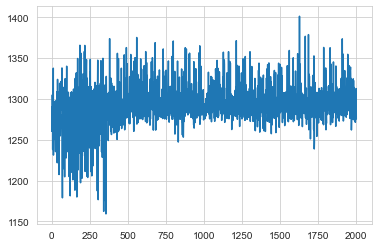

In [6]:
plt.plot(portfolio_value)

episode end value: 1206.90, duration: 0:00:00.097035
Sell: 357 times, Buy: 346 times


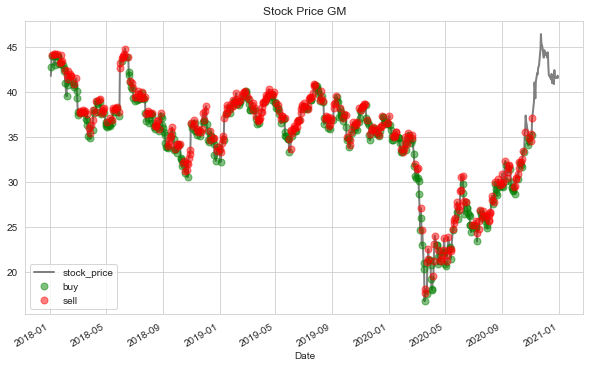

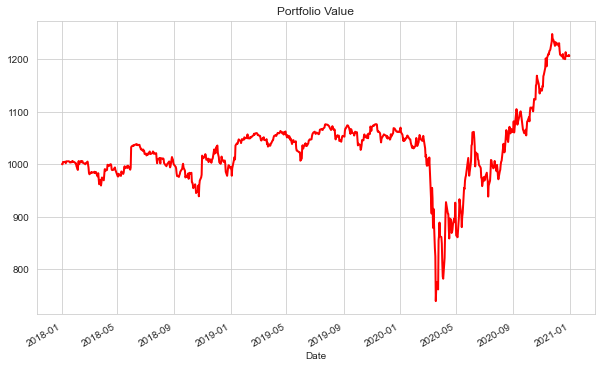

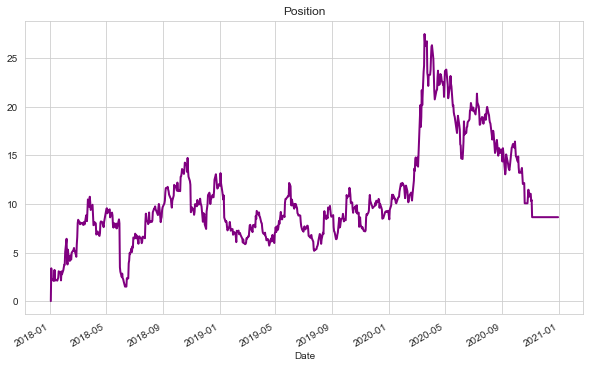

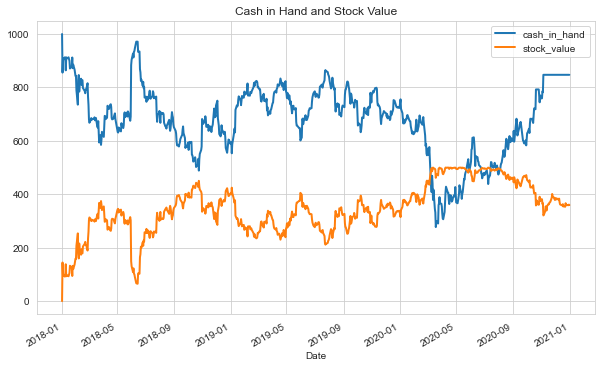

In [12]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [13]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 6.47 %
Volatility: 0.1992
shape ratio: 0.2695
Maximun drawdown: -31.37 %
Calmar ratio: 0.2062
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -0.13 %
Volatility (benchmark): 0.4230
shape ratio: -0.0290
Maximun drawdown: -62.54 %
Calmar ratio (benchmark): -0.0020


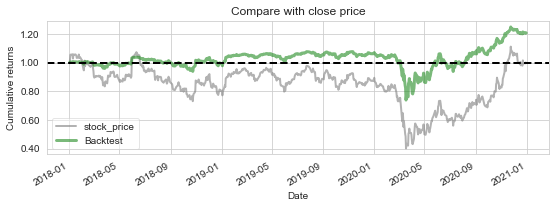

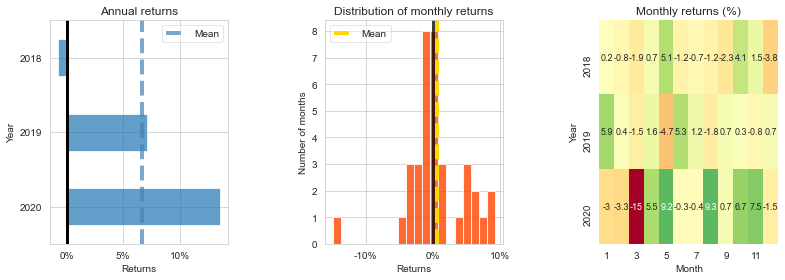

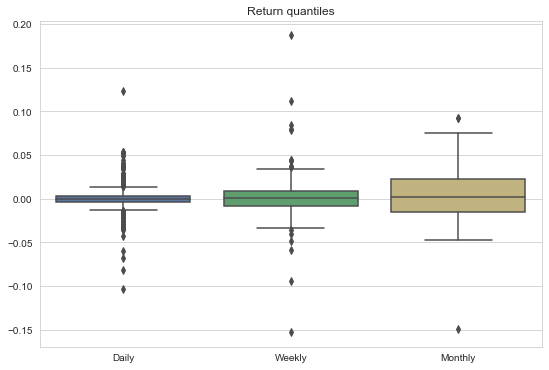

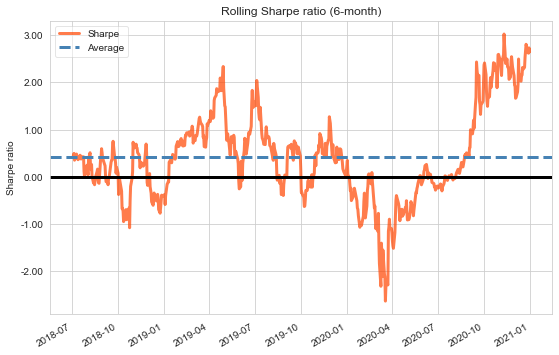

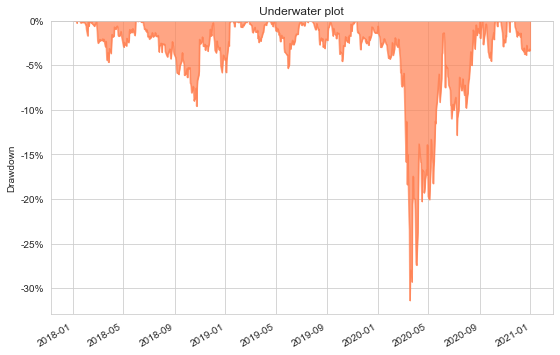

In [14]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')